# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to the environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.09500000160187483
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

# KM custom agent training space

In [6]:
from ddpg_agent import Agent
agent = Agent(num_agents, state_size, action_size, random_seed=0)

In [7]:
# main agent training code
import torch
import numpy as np
from collections import deque

episodes = 3000
solved   = False

scores = []                        # stores ALL the scores from ALL episodes
scores_window = deque(maxlen=100)  # stores last 100 episodes (to assess if/when environment is solved)

for episode in range(episodes): 
    if not solved:
        score = np.zeros(num_agents)                        # multiple agents
    
        # reset the environment
        env_info  = env.reset(train_mode=True)[brain_name]  # resets environment (for 1 or 20 agents)
        agent.reset()                                       # resets noise attribute of agent only
        # cur_state = env_info.vector_observations[0]
        states = env_info.vector_observations               # 2 agents 
    
        while True:
            # predict the best action(s) for the current state
            actions = agent.act(states, add_noise = False)  # 2 agents 
        
            # action(s) is/are performed and new state, reward, info are received (or vectors of each)
            env_info  = env.step(actions)[brain_name]       # 2 agents 
        
            # update state info, rewards and dones from new env_info collection
            new_states = env_info.vector_observations       # 2 agents 
            rewards    = env_info.rewards                   # 2 agents 
            dones      = env_info.local_done                # 2 agents 
        
            # current state, action, reward, new state are stored in the experience replay buffer
            agent.step(states, actions, rewards, new_states, dones) # 2 agents 
        
            # roll new state and score to next step in episode
            states = new_states                             # 2 agents 
            score += rewards                                # 2 agents
            if np.any(dones):                               # 2 agents 
                break
    
        max_reward = max(score[0], score[1])
        scores.append(max_reward)
        scores_window.append(max_reward)
        
        # print average score over last 100 episodes
        if (episode + 1) % 100 == 0:  
            print('\repisode [{}/{}]\taverage score: {:,.2f}'.format(episode + 1, episodes, np.mean(scores_window)))
        
        # environment considered solved when score >= 0.5 over last 100 episodes
        if np.mean(scores_window) >= 2.25:
            print("\nenvironment solved in {:d} episodes... average score: {:.2f}".format(episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'km_actor_k3.pth')
            torch.save(agent.critic_local.state_dict(), 'km_critic_k3.pth')
            solved = True

print('\noverall average score: {:,.2f} \n'.format(np.mean(scores)))

episode [100/3000]	average score: 0.00
episode [200/3000]	average score: 0.00
episode [300/3000]	average score: 0.00
episode [400/3000]	average score: 0.00
episode [500/3000]	average score: 0.01
episode [600/3000]	average score: 0.00
episode [700/3000]	average score: 0.01
episode [800/3000]	average score: 0.01
episode [900/3000]	average score: 0.00
episode [1000/3000]	average score: 0.00
episode [1100/3000]	average score: 0.00
episode [1200/3000]	average score: 0.02
episode [1300/3000]	average score: 0.01
episode [1400/3000]	average score: 0.03
episode [1500/3000]	average score: 0.04
episode [1600/3000]	average score: 0.19
episode [1700/3000]	average score: 0.43
episode [1800/3000]	average score: 0.98
episode [1900/3000]	average score: 0.84
episode [2000/3000]	average score: 0.62
episode [2100/3000]	average score: 1.19
episode [2200/3000]	average score: 0.63
episode [2300/3000]	average score: 0.38
episode [2400/3000]	average score: 1.23
episode [2500/3000]	average score: 0.58
episode [

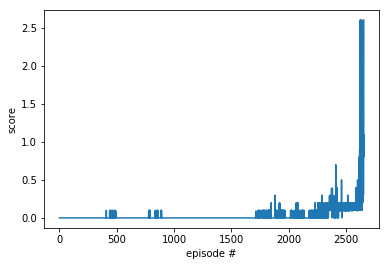

In [8]:
# plot the scores for both agents
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('score')
plt.xlabel('episode #')
plt.show()

In [9]:
# validate the agent performs as trained
for i in range(10):                                        # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    score_top = 0.0
    iterations = 0
    while True:
        # obtain recommended actions and process state/action pairs through engine
        actions = agent.act(states, add_noise=False) # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to the environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        
        # update scores and statistics so far in the episode
        scores += env_info.rewards                         # update the score (for each agent)
        max_score = max(scores[0], scores[1])              # get max score between players
        iterations += 1                                    # rough estimate of number of hits in volley
        
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    
    volleys = iterations / 14
    print('max agent score: {:.3f}\t averaged agent score: {:.3f}\t player volleys: {:.1f}'.format(max_score, np.mean(scores), volleys))

max agent score: 2.600	 averaged agent score: 2.600	 player volleys: 71.5
max agent score: 0.400	 averaged agent score: 0.395	 player volleys: 10.8
max agent score: 0.400	 averaged agent score: 0.395	 player volleys: 12.1
max agent score: 0.200	 averaged agent score: 0.145	 player volleys: 5.2
max agent score: 1.800	 averaged agent score: 1.795	 player volleys: 50.4
max agent score: 0.400	 averaged agent score: 0.395	 player volleys: 12.1
max agent score: 2.600	 averaged agent score: 2.550	 player volleys: 71.5
max agent score: 0.100	 averaged agent score: 0.045	 player volleys: 1.1
max agent score: 0.500	 averaged agent score: 0.495	 player volleys: 14.7
max agent score: 2.600	 averaged agent score: 2.550	 player volleys: 71.5


In [18]:
# load and compare the performance of agents that achieved 0.5, 1.0 and 2.0 levels of proficiency
import torch
actors =  ['km_actor_a.pth', 'km_actor_b.pth', 'km_actor_c.pth']     # list of actor model filenames
critics = ['km_critic_a.pth', 'km_critic_b.pth', 'km_critic_c.pth']  # list of critic model filenames

num_tests = 20

# load each pair for every pair in files
for actor, critic in zip(actors, critics):
    agent.actor_local.load_state_dict(torch.load(actor, map_location= 'cpu'))
    agent.critic_local.load_state_dict(torch.load(critic, map_location = 'cpu'))
    
    running_average = 0.0 
    running_volleys = 0.0
    
    print("\nactor file:  " + str(actor))
    print("critic file: " + str(critic))
    
    for i in range(num_tests):
        env_info = env.reset(train_mode=True)[brain_name]       # reset environment (same for any agent count) 
        states = env_info.vector_observations      
        scores_test = np.zeros(num_agents)  
        iterations = 0

        while True:
            # action = agent.act(cur_state, add_noise = False)
            actions = agent.act(states, add_noise = False) 
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations 
            rewards = env_info.rewards      
            dones = env_info.local_done     
        
            # update scores and statistics
            scores_test += rewards          
            max_score = max(scores_test[0], scores_test[1])
            iterations += 1
            
            states = next_states        
            if np.any(dones):               
            # if done:
                break

        volleys = iterations / 14
        running_average += np.mean(scores_test)
        running_volleys += volleys
        print('max agent score: {:.3f}\t averaged agent score: {:.3f}\t player volleys: {:.1f}'.format(max_score, np.mean(scores_test), volleys))
    
    print('average across test run: {:.3f}\t average volleys: {:.1f}'.format(running_average / num_tests, running_volleys / num_tests))


actor file:  km_actor_a.pth
critic file: km_critic_a.pth
max agent score: 2.600	 averaged agent score: 2.600	 player volleys: 71.5
max agent score: 0.100	 averaged agent score: 0.045	 player volleys: 1.1
max agent score: 0.200	 averaged agent score: 0.195	 player volleys: 6.1
max agent score: 0.100	 averaged agent score: 0.045	 player volleys: 2.1
max agent score: 2.600	 averaged agent score: 2.600	 player volleys: 71.5
max agent score: 2.600	 averaged agent score: 2.600	 player volleys: 71.5
max agent score: 0.100	 averaged agent score: 0.095	 player volleys: 2.6
max agent score: 0.200	 averaged agent score: 0.145	 player volleys: 5.1
max agent score: 0.100	 averaged agent score: 0.095	 player volleys: 4.5
max agent score: 2.600	 averaged agent score: 2.600	 player volleys: 71.5
max agent score: 2.600	 averaged agent score: 2.600	 player volleys: 71.5
max agent score: 0.100	 averaged agent score: 0.095	 player volleys: 2.8
max agent score: 0.200	 averaged agent score: 0.145	 player v